In [2]:
import numpy as np
import matplotlib.pyplot as plt
import gvar as gv

In [3]:
import h5py
import lsqfit

In [4]:
# Constants
hbarc = 197.3 # MeV fm
a = 0.12


In [5]:
# Get the data
file = h5py.File("a12m310_a_avg.h5", "r")
# First, work to replicate Jinchen's results
data_proton_dn = np.array(file['gf1p0_w3p0_n30_M51p2_L58_a1p5']['spec']['ml0p0126']['proton']['px0_py0_pz0']['spin_dn'])
data_proton_up = np.array(file['gf1p0_w3p0_n30_M51p2_L58_a1p5']['spec']['ml0p0126']['proton']['px0_py0_pz0']['spin_up'])
data_np_proton_dn = np.array(file['gf1p0_w3p0_n30_M51p2_L58_a1p5']['spec']['ml0p0126']['proton_np']['px0_py0_pz0']['spin_dn'])
data_np_proton_up = np.array(file['gf1p0_w3p0_n30_M51p2_L58_a1p5']['spec']['ml0p0126']['proton_np']['px0_py0_pz0']['spin_up'])


In [6]:
num_zs = 1 #Order number of the n's
# Log E: log of the energy.  
# P is point (in the context of )

# Define the 2-point fit function, for P-S and P-P
def C_2pt(t, p):
    
    z = np.array([])
    ztilde = np.array([])
    logE = np.array([])
    for i in range(num_zs):
        z = np.append(z, p['Z_{}'.format(i)])
        ztilde = np.append(ztilde, p['Ztilde_{}'.format(i)])
        logE = np.append(logE, p['logE_{}'.format(i)])
        
    E = np.exp(logE)
    
    sum_pp = sum([z[i]*z[i]*np.exp(-E[i]*t) for i in range(num_zs)])
    sum_ps = sum([z[i]*ztilde[i]*np.exp(-E[i]*t) for i in range(num_zs)])
    
    return np.transpose(np.array([[sum_pp], [sum_ps]]), axes=[2,0,1])


In [7]:
# Test first-order fit function
C_2pt(np.array([1,2,3,4,5, 6]), {'Z_0':2, 'Ztilde_0':3, 'logE_0':1})

array([[[2.63952143e-01],
        [3.95928215e-01]],

       [[1.74176835e-02],
        [2.61265252e-02]],

       [[1.14935872e-03],
        [1.72403808e-03]],

       [[7.58439246e-05],
        [1.13765887e-04]],

       [[5.00479162e-06],
        [7.50718742e-06]],

       [[3.30256369e-07],
        [4.95384553e-07]]])

In [8]:
protons = (data_proton_dn + data_proton_up + data_np_proton_dn + data_np_proton_up)/4.

In [9]:
proton_timeavg = gv.dataset.avg_data(protons)
proton_timeavg[1][1][0]

/Users/the_admin/.conda/envs/thesis2020/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


4.599(13)e-06

In [10]:
# try an alternative averaging method
all_protons = np.concatenate([data_proton_dn, data_proton_up, data_np_proton_dn, data_np_proton_up])
new_proton_timeavg = gv.dataset.avg_data(all_protons)
new_proton_timeavg[1][1][0]

4.5993(66)e-06

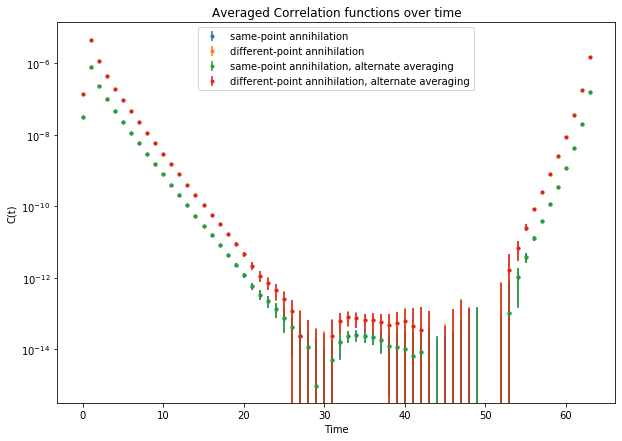

In [11]:
# Plot
fig = plt.figure(figsize=(10,7))
ax = plt.axes()
ax.semilogy()
ax.errorbar([i for i in range(len(proton_timeavg))], [proton_timeavg[i][0][0].mean for i in range(len(proton_timeavg))], yerr=[proton_timeavg[i][0][0].sdev for i in range(len(proton_timeavg))], fmt='.', label="same-point annihilation")
ax.errorbar([i for i in range(len(proton_timeavg))], [proton_timeavg[i][1][0].mean for i in range(len(proton_timeavg))], yerr=[proton_timeavg[i][1][0].sdev for i in range(len(proton_timeavg))], fmt='.', label="different-point annihilation")
ax.errorbar([i for i in range(len(new_proton_timeavg))], [new_proton_timeavg[i][0][0].mean for i in range(len(new_proton_timeavg))], yerr=[new_proton_timeavg[i][0][0].sdev for i in range(len(new_proton_timeavg))], fmt='.', label="same-point annihilation, alternate averaging")
ax.errorbar([i for i in range(len(new_proton_timeavg))], [new_proton_timeavg[i][1][0].mean for i in range(len(new_proton_timeavg))], yerr=[new_proton_timeavg[i][1][0].sdev for i in range(len(new_proton_timeavg))], fmt='.', label="different-point annihilation, alternate averaging")
plt.xlabel("Time")
plt.ylabel("C(t)")
plt.title("Averaged Correlation functions over time")
plt.legend()
plt.show()

<ipython-input-12-19736a0da070>:3: RuntimeWarning: invalid value encountered in log
  eff_mass = [[np.log(proton_timeavg[t][0][0]/proton_timeavg[t+tau][0][0])/tau for t in range(len(proton_timeavg)-tau)],\
<ipython-input-12-19736a0da070>:4: RuntimeWarning: invalid value encountered in log
  [np.log(proton_timeavg[t][1][0]/proton_timeavg[t+tau][1][0])/tau for t in range(len(proton_timeavg)-tau)]]


Same-annihilation: 
1 th element:  -3.2210(83)
2 th element:  1.22465(96)
3 th element:  0.85916(81)
4 th element:  0.75946(92)
5 th element:  0.7150(11)
6 th element:  0.6933(12)
7 th element:  0.6814(13)
8 th element:  0.6730(16)
9 th element:  0.6673(20)
10 th element:  0.6653(25)
11 th element:  0.6635(34)
12 th element:  0.6648(46)
13 th element:  0.6665(64)
14 th element:  0.6568(89)
15 th element:  0.643(13)
16 th element:  0.631(18)
17 th element:  0.631(24)
18 th element:  0.626(32)
19 th element:  0.647(48)
20 th element:  0.673(73)
21 th element:  0.68(11)
22 th element:  0.56(13)
23 th element:  0.42(14)
24 th element:  0.48(18)
25 th element:  0.60(26)
26 th element:  0.61(38)
27 th element:  0.54(52)
28 th element:  0.7(1.0)
29 th element:  2(17)
30 th element:  nan +- 24.1508
31 th element:  nan +- 8.21958
32 th element:  -1.2(2.0)
33 th element:  -0.42(36)
34 th element:  -0.04(17)
35 th element:  0.08(17)
36 th element:  0.05(19)
37 th element:  0.22(27)
38 th element:

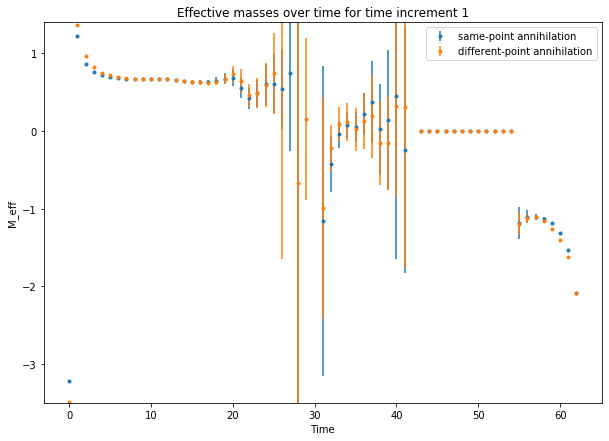

In [12]:
tau = 1
# Effective mass data (same annihilation, different annihilation)
eff_mass = [[np.log(proton_timeavg[t][0][0]/proton_timeavg[t+tau][0][0])/tau for t in range(len(proton_timeavg)-tau)],\
            [np.log(proton_timeavg[t][1][0]/proton_timeavg[t+tau][1][0])/tau for t in range(len(proton_timeavg)-tau)]]
print("Same-annihilation: ")
for i in range(len(eff_mass[0])):
    print(i+1, "th element: ", eff_mass[0][i])
print("\nDifferent-annihilation: ")
for i in range(len(eff_mass[1])):
    print(i+1, "th element: ", eff_mass[1][i])
    
# Zero out all elements from indices 43 to 54, as a lot of these ones are inconsistent and bad, due to an extreme in the correlation function there    
for i in range(43, 55):
    eff_mass[0][i] = gv.gvar(0,0)
    eff_mass[1][i] = gv.gvar(0,0)

# Plot
fig = plt.figure(figsize=(10,7))
ax = plt.axes()
ax.errorbar([i for i in range(len(eff_mass[0]))], [eff_mass[0][i].mean for i in range(len(eff_mass[0]))], yerr=[eff_mass[0][i].sdev for i in range(len(eff_mass[0]))], fmt='.', label="same-point annihilation")
ax.errorbar([i for i in range(len(eff_mass[1]))], [eff_mass[1][i].mean for i in range(len(eff_mass[1]))], yerr=[eff_mass[1][i].sdev for i in range(len(eff_mass[1]))], fmt='.', label="different-point annihilation")

plt.xlabel("Time")
plt.ylabel("M_eff")
plt.ylim(-3.5, 1.4)
plt.title("Effective masses over time for time increment {}".format(tau))
plt.legend()
plt.show()

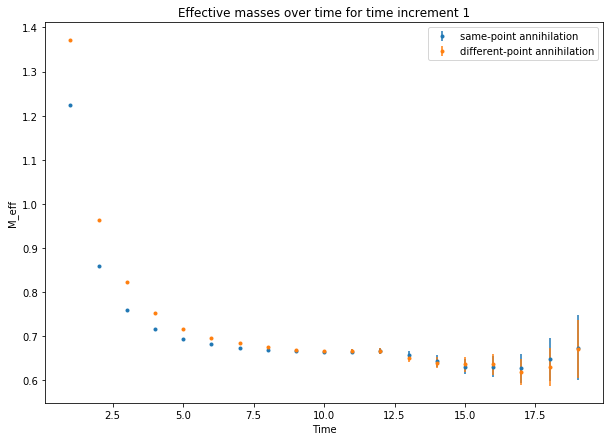

In [13]:
# Plot
fig = plt.figure(figsize=(10,7))
ax = plt.axes()
ax.errorbar([i for i in range(1,20)], [eff_mass[0][i].mean for i in range(1,20)], yerr=[eff_mass[0][i].sdev for i in range(1,20)], fmt='.', label="same-point annihilation")
ax.errorbar([i for i in range(1,20)], [eff_mass[1][i].mean for i in range(1,20)], yerr=[eff_mass[1][i].sdev for i in range(1,20)], fmt='.', label="different-point annihilation")

plt.xlabel("Time")
plt.ylabel("M_eff")
#plt.ylim(0.6, 0.8)
plt.title("Effective masses over time for time increment {}".format(tau))
plt.legend()
plt.show()

In [14]:
# Start prioring
# First order effective mass 
print("Effective mass: P: ", eff_mass[0][10], " S: ", eff_mass[1][10])

Effective mass: P:  0.6635(34)  S:  0.6650(33)


In [15]:
priors_PP = {'logE_0': np.log(gv.gvar(eff_mass[0][10].mean, eff_mass[0][10].sdev*10))}
priors_PS = {'logE_0': np.log(gv.gvar(eff_mass[0][9].mean, eff_mass[0][9].sdev*10))}

z0_res = np.sqrt(proton_timeavg[9][0][0]/np.exp(-priors_PP['logE_0']*8)) 
# To find z-tilde, divide the z-ztilde result from dividing correlationfunction_PS by e^(-Et) 
# by the Z-result for PP from sqrt(correlationfunction_PP/e^(-Et))
z0ztilde_PS = proton_timeavg[9][1][0]/np.exp(-priors_PS['logE_0']*8)
z0tilde_res = z0ztilde_PS/z0_res

priors_PP.update({'Z_0': gv.gvar(0, 2)}) #z0_res.mean, z0_res.sdev*20
priors_PS.update({'Z_0': gv.gvar(0, 2)})
priors_PS.update({'Ztilde_0': gv.gvar(0, 2)})

In [16]:
priors_PS

{'logE_0': -0.407(38), 'Z_0': 0.0(2.0), 'Ztilde_0': 0.0(2.0)}

In [17]:
fit = lsqfit.nonlinear_fit(data=(np.array([i for i in range(9, 13)]), np.array([proton_timeavg[i] for i in range(9,13)])), prior=priors_PS,fcn=C_2pt,debug=True)
print(fit.format(pstyle='vv'))

Least Square Fit:
  chi2/dof [dof] = 2 [8]    Q = 0.041    logGBF = 170.46

Parameters:
         logE_0      -0.402391 +- 0.00342643             [ -0.40747 +- 0.0381765 ]  
            Z_0   0.000790428 +- 7.30718e-06             [                0 +- 2 ]  
       Ztilde_0     0.00301724 +- 2.9732e-05             [                0 +- 2 ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10,1e-10*)    (itns/time = 15/0.1)
  fitter = scipy_least_squares    method = trf



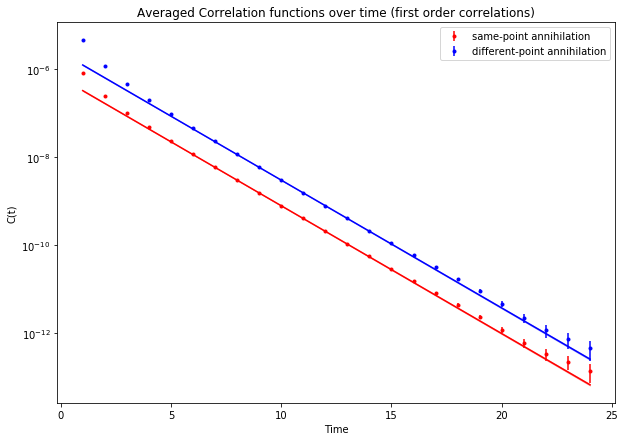

In [18]:
#colors

#clr = plot_params['op_color'][spacing]
    #y_mean = gv.mean(y_plot[spacing])
    #y_sdev = gv.sdev(y_plot[spacing])
    #ax.errorbar(x=x_plot,y=y_mean,ls='-',color=clr)
    #ax.fill_between(x_plot,y_mean+y_sdev,y_mean-y_sdev, color=clr,alpha=0.3)

# Compute function output25
y_sample = C_2pt(np.array([i for i in range(0,25)]), fit.p)

# Plot
fig = plt.figure(figsize=(10,7))
ax = plt.axes()
ax.semilogy()
ax.errorbar([i for i in range(1,25)], [proton_timeavg[i][0][0].mean for i in range(1,25)], yerr=[proton_timeavg[i][0][0].sdev for i in range(1,25)], fmt='.', label="same-point annihilation", color='red')
ax.errorbar([i for i in range(1,25)], [proton_timeavg[i][1][0].mean for i in range(1,25)], yerr=[proton_timeavg[i][1][0].sdev for i in range(1,25)], fmt='.', label="different-point annihilation", color='blue')
ax.errorbar([i for i in range(1,25)],[y_sample[i][0][0].mean for i in range(1,25)],ls='-',color="red")
ax.fill_between([i for i in range(1,25)],[y_sample[i][0][0].mean + y_sample[i][0][0].sdev for i in range(1,25)], [y_sample[i][0][0].mean - y_sample[i][0][0].sdev for i in range(1,25)], color="red",alpha=0.3)
ax.errorbar([i for i in range(1,25)],[y_sample[i][1][0].mean for i in range(1,25)],ls='-',color="blue")
ax.fill_between([i for i in range(1,25)],[y_sample[i][1][0].mean + y_sample[i][1][0].sdev for i in range(1,25)], [y_sample[i][1][0].mean - y_sample[i][1][0].sdev for i in range(1,25)], color="blue",alpha=0.3)
plt.xlabel("Time")
plt.ylabel("C(t)")
plt.title("Averaged Correlation functions over time (first order correlations)")
plt.legend()
plt.show()



In [19]:
# use the C-model to create a plot of effective mass
model_eff_mass = np.array([np.log(y_sample[i]/y_sample[i+1]) for i in range(0,24)])
model_eff_mass

array([[[0.6687(23)],
        [0.6687(23)]],

       [[0.6687(23)],
        [0.6687(23)]],

       [[0.6687(23)],
        [0.6687(23)]],

       [[0.6687(23)],
        [0.6687(23)]],

       [[0.6687(23)],
        [0.6687(23)]],

       [[0.6687(23)],
        [0.6687(23)]],

       [[0.6687(23)],
        [0.6687(23)]],

       [[0.6687(23)],
        [0.6687(23)]],

       [[0.6687(23)],
        [0.6687(23)]],

       [[0.6687(23)],
        [0.6687(23)]],

       [[0.6687(23)],
        [0.6687(23)]],

       [[0.6687(23)],
        [0.6687(23)]],

       [[0.6687(23)],
        [0.6687(23)]],

       [[0.6687(23)],
        [0.6687(23)]],

       [[0.6687(23)],
        [0.6687(23)]],

       [[0.6687(23)],
        [0.6687(23)]],

       [[0.6687(23)],
        [0.6687(23)]],

       [[0.6687(23)],
        [0.6687(23)]],

       [[0.6687(23)],
        [0.6687(23)]],

       [[0.6687(23)],
        [0.6687(23)]],

       [[0.6687(23)],
        [0.6687(23)]],

       [[0.6687(23)],
        [0.6

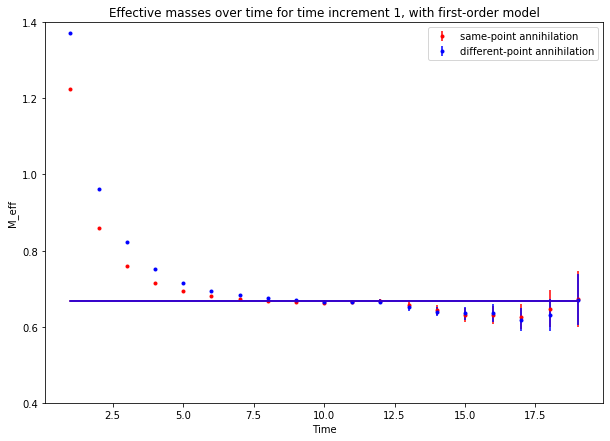

In [20]:
# Plot the fit's result and the data's result for the effective mass
# Plot
fig = plt.figure(figsize=(10,7))
ax = plt.axes()
ax.errorbar([i for i in range(1,20)], [eff_mass[0][i].mean for i in range(1,20)], yerr=[eff_mass[0][i].sdev for i in range(1,20)], fmt='.', label="same-point annihilation", color="red")
ax.errorbar([i for i in range(1,20)], [eff_mass[1][i].mean for i in range(1,20)], yerr=[eff_mass[1][i].sdev for i in range(1,20)], fmt='.', label="different-point annihilation", color="blue")

ax.errorbar([i for i in range(1,20)],[model_eff_mass[i][0][0].mean for i in range(1,20)],ls='-',color="red")
ax.fill_between([i for i in range(1,20)],[model_eff_mass[i][0][0].mean + model_eff_mass[i][0][0].sdev for i in range(1,20)], [model_eff_mass[i][0][0].mean - model_eff_mass[i][0][0].sdev for i in range(1,20)], color="red",alpha=0.3)
ax.errorbar([i for i in range(1,20)],[model_eff_mass[i][1][0].mean for i in range(1,20)],ls='-',color="blue")
ax.fill_between([i for i in range(1,20)],[model_eff_mass[i][1][0].mean + model_eff_mass[i][1][0].sdev for i in range(1,20)], [model_eff_mass[i][1][0].mean - model_eff_mass[i][1][0].sdev for i in range(1,20)], color="blue",alpha=0.3)

plt.xlabel("Time")
plt.ylabel("M_eff")
plt.ylim(0.4, 1.4)
plt.title("Effective masses over time for time increment {}, with first-order model".format(tau))
plt.legend()
plt.show()

As we can see, the zero-order model onnly models the times 8, 9, 10, 11, and 12 well. Let's see if a higher-order model can model other times well.

In [21]:
E_excited = np.array([gv.gvar(1.0450, 0.04), gv.gvar(1.1792, 0.03), \
                      gv.gvar(1.2285, 0.04), gv.gvar(1.2984, 0.03), gv.gvar(1.3675, 0.04), \
                      gv.gvar(1.4170, 0.04), gv.gvar(1.4555, 0.04), gv.gvar(1.5032, 0.03), \
                      gv.gvar(1.5512, 0.04), gv.gvar(1.5975, 0.03), gv.gvar(1.6357, 0.04), \
                      gv.gvar(1.6754, 0.04)])

In [22]:
# From the energy level diagram worked on in late March, come up with priors for higher order energies
# Since the hisher order energies were calculated 
# Except in the continuum limit (above 1.68) where the energies are basically continuous. There, I would add the energies one-by-one and have an agnostc prior

for i in range(0, 12):
    priors_PS.update({'logE_{}'.format(i+1):np.log(E_excited[i])})
    priors_PS.update({'Z_{}'.format(i+1):gv.gvar(0,2)})
    priors_PS.update({'Ztilde_{}'.format(i+1):gv.gvar(0,2)})

In [23]:
priors_PS

{'logE_0': -0.407(38),
 'Z_0': 0.0(2.0),
 'Ztilde_0': 0.0(2.0),
 'logE_1': 0.044(38),
 'Z_1': 0.0(2.0),
 'Ztilde_1': 0.0(2.0),
 'logE_2': 0.165(25),
 'Z_2': 0.0(2.0),
 'Ztilde_2': 0.0(2.0),
 'logE_3': 0.206(33),
 'Z_3': 0.0(2.0),
 'Ztilde_3': 0.0(2.0),
 'logE_4': 0.261(23),
 'Z_4': 0.0(2.0),
 'Ztilde_4': 0.0(2.0),
 'logE_5': 0.313(29),
 'Z_5': 0.0(2.0),
 'Ztilde_5': 0.0(2.0),
 'logE_6': 0.349(28),
 'Z_6': 0.0(2.0),
 'Ztilde_6': 0.0(2.0),
 'logE_7': 0.375(27),
 'Z_7': 0.0(2.0),
 'Ztilde_7': 0.0(2.0),
 'logE_8': 0.408(20),
 'Z_8': 0.0(2.0),
 'Ztilde_8': 0.0(2.0),
 'logE_9': 0.439(26),
 'Z_9': 0.0(2.0),
 'Ztilde_9': 0.0(2.0),
 'logE_10': 0.468(19),
 'Z_10': 0.0(2.0),
 'Ztilde_10': 0.0(2.0),
 'logE_11': 0.492(24),
 'Z_11': 0.0(2.0),
 'Ztilde_11': 0.0(2.0),
 'logE_12': 0.516(24),
 'Z_12': 0.0(2.0),
 'Ztilde_12': 0.0(2.0)}

In [24]:
# Begin fitting higher order functions
num_zs = 3
fit3 = lsqfit.nonlinear_fit(data=(np.array([i for i in range(5, 22)]), np.array([proton_timeavg[i] for i in range(5,22)])), prior=priors_PS,fcn=C_2pt,debug=True)
print(fit3.format(pstyle='vv'))

Least Square Fit:
  chi2/dof [dof] = 0.95 [34]    Q = 0.55    logGBF = 835.19

Parameters:
         logE_0      -0.414302 +- 0.00673934             [  -0.40747 +- 0.0381765 ]  
            Z_0   0.000757175 +- 1.84633e-05             [                 0 +- 2 ]  
       Ztilde_0    0.00286587 +- 7.33787e-05             [                 0 +- 2 ]  
         logE_1       0.0425665 +- 0.0382642             [ 0.0440169 +- 0.0382775 ]  
            Z_1   0.000158596 +- 0.000929044             [                 0 +- 2 ]  
       Ztilde_1     0.00191091 +- 0.00379626             [                 0 +- 2 ]  
         logE_2        0.168257 +- 0.0253615             [   0.164836 +- 0.025441 ]  
            Z_2    0.00079171 +- 0.000228524             [                 0 +- 2 ]  
       Ztilde_2    0.00507883 +- 0.000682307             [                 0 +- 2 ]  
         logE_3          0.205794 +- 0.03256             [    0.205794 +- 0.03256 ]  
            Z_3                       0 +- 2     

Stretching the fit out the high-end (above 13) does not seem to affect the quality or output of the fit by much.
The result for a max tsep of 13 is much the same as that of a tsep of 25. One comment though: higher max tsep often means a lower
chi-square, likely due to the high uncertainty in that range.

One comment: This doesn't happen with a minimum tsep of 5, but with a mean tsep of 4, the E=1.179 energy seems to
drift towards 1.214, which is not a pion excited state. It is possible that this is an indicator of a neglected source of higher-order energy, but first, let's try adding more energy levels. Especially since it's fairly close to the 1.2285 state.

In [25]:
num_zs = 4
fit4 = lsqfit.nonlinear_fit(data=(np.array([i for i in range(4, 22)]), np.array([proton_timeavg[i] for i in range(4,22)])), prior=priors_PS,fcn=C_2pt,debug=True)
print(fit4.format(pstyle='vv'))

Least Square Fit:
  chi2/dof [dof] = 0.91 [36]    Q = 0.62    logGBF = 868.24

Parameters:
         logE_0       -0.41108 +- 0.00322419             [  -0.40747 +- 0.0381765 ]  
            Z_0   0.000766335 +- 7.05198e-06             [                 0 +- 2 ]  
       Ztilde_0    0.00287872 +- 3.22848e-05             [                 0 +- 2 ]  
         logE_1       0.0500462 +- 0.0381046             [ 0.0440169 +- 0.0382775 ]  
            Z_1   2.92012e-05 +- 0.000472259             [                 0 +- 2 ]  
       Ztilde_1          0.122307 +- 1.97366             [                 0 +- 2 ]  
         logE_2        0.167165 +- 0.0253985             [   0.164836 +- 0.025441 ]  
            Z_2    7.3264e-05 +- 0.000685627             [                 0 +- 2 ]  
       Ztilde_2         -0.209266 +- 1.97093             [                 0 +- 2 ]  
         logE_3        0.225636 +- 0.0239236             [    0.205794 +- 0.03256 ]  
            Z_3    0.00089414 +- 6.67567e-05     

I noticed that to get to min tsep = 3, I need a log_E point of about 0.32 (about 1.384 in E), so that'll be num_zs = 8. One peculiarity: this stretch out to 0.32 happened for max tsep = 22, but not for max tsep = 14

In [26]:
num_zs = 7
fit7 = lsqfit.nonlinear_fit(data=(np.array([i for i in range(3, 22)]), np.array([proton_timeavg[i] for i in range(3,22)])), prior=priors_PS,fcn=C_2pt,debug=True)
print(fit7.format(pstyle='vv'))

Least Square Fit:
  chi2/dof [dof] = 1.1 [38]    Q = 0.35    logGBF = 876.75

Parameters:
         logE_0      -0.406533 +- 0.00456728             [  -0.40747 +- 0.0381765 ]  
            Z_0   0.000776597 +- 1.25967e-05             [                 0 +- 2 ]  
       Ztilde_0    0.00294034 +- 9.99743e-05             [                 0 +- 2 ]  
         logE_1       0.0374265 +- 0.0381924             [ 0.0440169 +- 0.0382775 ]  
            Z_1    0.00030728 +- 0.000706746             [                 0 +- 2 ]  
       Ztilde_1      -0.00111298 +- 0.225159             [                 0 +- 2 ]  
         logE_2         0.16332 +- 0.0254397             [   0.164836 +- 0.025441 ]  
            Z_2      6.6226e-05 +- 0.0111199             [                 0 +- 2 ]  
       Ztilde_2          0.218409 +- 1.98896             [                 0 +- 2 ]  
         logE_3        0.206605 +- 0.0325598             [    0.205794 +- 0.03256 ]  
            Z_3     1.66019e-05 +- 0.0114146      

In [27]:
np.exp(0.173064)

1.1889421949496073

For now, it seems that all of the secondary states set aside in my notebook are all within uncertainty of my primary results. One thing to note: for min tsep=3, the 1.2285 energy state becomes 1.1889.

For the point tsep = 2, the next energies to select (which the system seems to be drifting towards) seem to be 1.49 and 1.53.

Also:
when I'm done fitting all the high energy points, I think I should try to ensure that that we don't overfit the lower-energy points at the expense of the higher-energy ones. I can think of 3 ways to do this:

(1) set a minimum to the points fitted to

(2) weight the function to be minimized in the least-squares algorithm so that it would be "biased" in favor of the higher energy points (particularly problem spots). One way to do this while still using the lsqfit function would be to artificially reduce the uncertainties on the higher-order terms.

(3) simply fit more points

In [28]:
num_zs = 10
fit10 = lsqfit.nonlinear_fit(data=(np.array([i for i in range(2, 22)]), np.array([proton_timeavg[i] for i in range(2,22)])), prior=priors_PS,fcn=C_2pt,debug=True)
print(fit10.format(pstyle='vv'))

Least Square Fit:
  chi2/dof [dof] = 5.7 [40]    Q = 2.1e-28    logGBF = 818.2

Parameters:
         logE_0       -0.40497 +- 0.00655738             [  -0.40747 +- 0.0381765 ]  
            Z_0   0.000787564 +- 1.91384e-05             [                 0 +- 2 ]  
       Ztilde_0    0.00299346 +- 8.94347e-05             [                 0 +- 2 ]  
         logE_1       0.0339029 +- 0.0382773             [ 0.0440169 +- 0.0382775 ]  
            Z_1    6.91152e-05 +- 0.00379813             [                 0 +- 2 ]  
       Ztilde_1       -0.0101835 +- 0.490255             [                 0 +- 2 ]  
         logE_2         0.157349 +- 0.025441             [   0.164836 +- 0.025441 ]  
            Z_2     2.61593e-06 +- 0.0151714             [                 0 +- 2 ]  
       Ztilde_2                0.143428 +- 2             [                 0 +- 2 ]  
         logE_3          0.216543 +- 0.03256             [    0.205794 +- 0.03256 ]  
            Z_3      -7.38485e-05 +- 0.16936    

In [29]:
num_zs = 13
fit13 = lsqfit.nonlinear_fit(data=(np.array([i for i in range(2, 22)]), np.array([proton_timeavg[i] for i in range(2,22)])), prior=priors_PS,fcn=C_2pt,debug=True)
print(fit13.format(pstyle='vv'))

Least Square Fit:
  chi2/dof [dof] = 2.4 [40]    Q = 1.2e-06    logGBF = 869.12

Parameters:
         logE_0        -0.3995 +- 0.0106404            [  -0.40747 +- 0.0381765 ]  
            Z_0   0.00079097 +- 3.59597e-05            [                 0 +- 2 ]  
       Ztilde_0   0.00303593 +- 0.000147794            [                 0 +- 2 ]  
         logE_1        0.03223 +- 0.0382768            [ 0.0440169 +- 0.0382775 ]  
            Z_1   0.000340705 +- 0.00125062            [                 0 +- 2 ]  
       Ztilde_1     -0.00922018 +- 0.160022            [                 0 +- 2 ]  
         logE_2        0.158806 +- 0.025441            [   0.164836 +- 0.025441 ]  
            Z_2   7.08762e-05 +- 0.00333028            [                 0 +- 2 ]  
       Ztilde_2         0.291237 +- 1.99999            [                 0 +- 2 ]  
         logE_3         0.217649 +- 0.03256            [    0.205794 +- 0.03256 ]  
            Z_3    4.59719e-05 +- 0.0250304            [           

The 12th excited state, 1.6357, seems to drift towards a splitting of itself, 1.650. Other than that, the fit looks all good.

In [30]:
# Go into the the continuous regime to fit the highest-energy state
priors_PS.update({'logE_{}'.format(13):np.log(gv.gvar(2,0.31))})
priors_PS.update({'Z_{}'.format(13):gv.gvar(0,2)})    
priors_PS.update({'Ztilde_{}'.format(13):gv.gvar(0,2)})

In [31]:
num_zs = 14
fit14 = lsqfit.nonlinear_fit(data=(np.array([i for i in range(2, 22)]), np.array([proton_timeavg[i] for i in range(2,22)])), prior=priors_PS,fcn=C_2pt,debug=True)
print(fit14.format(pstyle='vv'))

Least Square Fit:
  chi2/dof [dof] = 0.86 [40]    Q = 0.73    logGBF = 901.83

Parameters:
         logE_0       -0.40835 +- 0.00817062             [  -0.40747 +- 0.0381765 ]  
            Z_0   0.000771374 +- 2.48911e-05             [                 0 +- 2 ]  
       Ztilde_0    0.00291492 +- 9.20633e-05             [                 0 +- 2 ]  
         logE_1        0.032999 +- 0.0382775             [ 0.0440169 +- 0.0382775 ]  
            Z_1    1.98044e-05 +- 0.00433747             [                 0 +- 2 ]  
       Ztilde_1         -0.012342 +- 1.99647             [                 0 +- 2 ]  
         logE_2        0.161521 +- 0.0254385             [   0.164836 +- 0.025441 ]  
            Z_2   -0.000655683 +- 0.00581647             [                 0 +- 2 ]  
       Ztilde_2       -0.0381547 +- 0.739692             [                 0 +- 2 ]  
         logE_3        0.224349 +- 0.0325498             [    0.205794 +- 0.03256 ]  
            Z_3     0.000177588 +- 0.0133785     

Since just using an agnostic prior for the fit which includes the tsep = 1 point doesn't work, what I'll do when the time comes is use PCA to find the right energy value, then use that as my prior.

In [31]:
np.exp(0.173915)

1.1899544153962218

In [32]:
np.exp(0.209856)

1.2335004231062696

In [33]:
np.exp(0.261133)

1.2984003411958762

In [34]:
np.exp(0.312984)

1.3674996508581505

In [35]:
np.exp(0.348542)

1.4170000556759952

In [36]:
np.exp(0.361615)

1.4356461117943327

In [37]:
np.exp(0.333)

1.3951472984698037

In [38]:
np.exp(0.397413)

1.4879703349162892

In [39]:
np.exp(0.424075)

1.5281762027013717

In [40]:
np.exp(0.516052)

1.6754000959374744

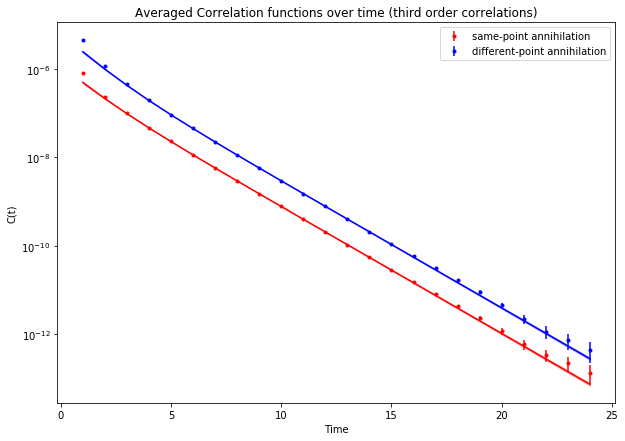

In [41]:
num_zs = 3
# Plot the results of the 3rd-order fit vs. the actual data
# Compute function output
y_sample = C_2pt(np.array([i for i in range(0,25)]), fit3.p)

# Plot
fig = plt.figure(figsize=(10,7))
ax = plt.axes()
ax.semilogy()
ax.errorbar([i for i in range(1,25)], [proton_timeavg[i][0][0].mean for i in range(1,25)], yerr=[proton_timeavg[i][0][0].sdev for i in range(1,25)], fmt='.', label="same-point annihilation", color='red')
ax.errorbar([i for i in range(1,25)], [proton_timeavg[i][1][0].mean for i in range(1,25)], yerr=[proton_timeavg[i][1][0].sdev for i in range(1,25)], fmt='.', label="different-point annihilation", color='blue')
ax.errorbar([i for i in range(1,25)],[y_sample[i][0][0].mean for i in range(1,25)],ls='-',color="red")
ax.fill_between([i for i in range(1,25)],[y_sample[i][0][0].mean + y_sample[i][0][0].sdev for i in range(1,25)], [y_sample[i][0][0].mean - y_sample[i][0][0].sdev for i in range(1,25)], color="red",alpha=0.3)
ax.errorbar([i for i in range(1,25)],[y_sample[i][1][0].mean for i in range(1,25)],ls='-',color="blue")
ax.fill_between([i for i in range(1,25)],[y_sample[i][1][0].mean + y_sample[i][1][0].sdev for i in range(1,25)], [y_sample[i][1][0].mean - y_sample[i][1][0].sdev for i in range(1,25)], color="blue",alpha=0.3)
plt.xlabel("Time")
plt.ylabel("C(t)")
plt.title("Averaged Correlation functions over time (third order correlations)")
plt.legend()
plt.show()

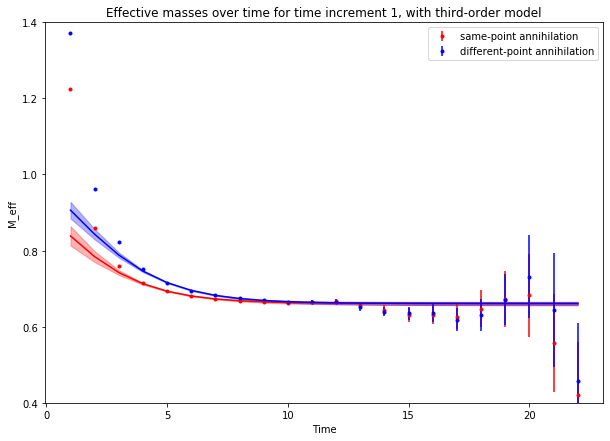

In [42]:
# Plot the fourth-order fit's result and the data's result for the effective mass
# Plot
model_eff_mass = np.array([np.log(y_sample[i]/y_sample[i+1]) for i in range(0,24)])

fig = plt.figure(figsize=(10,7))
ax = plt.axes()
ax.errorbar([i for i in range(1,23)], [eff_mass[0][i].mean for i in range(1,23)], yerr=[eff_mass[0][i].sdev for i in range(1,23)], fmt='.', label="same-point annihilation", color="red")
ax.errorbar([i for i in range(1,23)], [eff_mass[1][i].mean for i in range(1,23)], yerr=[eff_mass[1][i].sdev for i in range(1,23)], fmt='.', label="different-point annihilation", color="blue")

ax.errorbar([i for i in range(1,23)],[model_eff_mass[i][0][0].mean for i in range(1,23)],ls='-',color="red")
ax.fill_between([i for i in range(1,23)],[model_eff_mass[i][0][0].mean + model_eff_mass[i][0][0].sdev for i in range(1,23)], [model_eff_mass[i][0][0].mean - model_eff_mass[i][0][0].sdev for i in range(1,23)], color="red",alpha=0.3)
ax.errorbar([i for i in range(1,23)],[model_eff_mass[i][1][0].mean for i in range(1,23)],ls='-',color="blue")
ax.fill_between([i for i in range(1,23)],[model_eff_mass[i][1][0].mean + model_eff_mass[i][1][0].sdev for i in range(1,23)], [model_eff_mass[i][1][0].mean - model_eff_mass[i][1][0].sdev for i in range(1,23)], color="blue",alpha=0.3)

plt.xlabel("Time")
plt.ylabel("M_eff")
plt.ylim(0.4, 1.4)
plt.title("Effective masses over time for time increment {}, with third-order model".format(tau))
plt.legend()
plt.show()

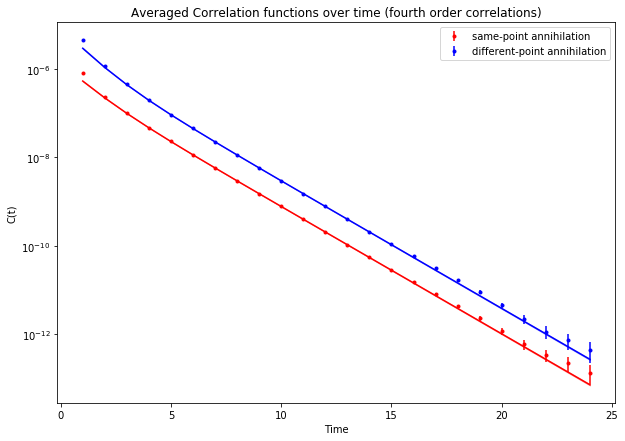

In [43]:
num_zs = 4
# Plot the results of the 5th-order fit vs. the actual data
# Compute function output
y_sample = C_2pt(np.array([i for i in range(0,25)]), fit4.p)

# Plot
fig = plt.figure(figsize=(10,7))
ax = plt.axes()
ax.semilogy()
ax.errorbar([i for i in range(1,25)], [proton_timeavg[i][0][0].mean for i in range(1,25)], yerr=[proton_timeavg[i][0][0].sdev for i in range(1,25)], fmt='.', label="same-point annihilation", color='red')
ax.errorbar([i for i in range(1,25)], [proton_timeavg[i][1][0].mean for i in range(1,25)], yerr=[proton_timeavg[i][1][0].sdev for i in range(1,25)], fmt='.', label="different-point annihilation", color='blue')
ax.errorbar([i for i in range(1,25)],[y_sample[i][0][0].mean for i in range(1,25)],ls='-',color="red")
ax.fill_between([i for i in range(1,25)],[y_sample[i][0][0].mean + y_sample[i][0][0].sdev for i in range(1,25)], [y_sample[i][0][0].mean - y_sample[i][0][0].sdev for i in range(1,25)], color="red",alpha=0.3)
ax.errorbar([i for i in range(1,25)],[y_sample[i][1][0].mean for i in range(1,25)],ls='-',color="blue")
ax.fill_between([i for i in range(1,25)],[y_sample[i][1][0].mean + y_sample[i][1][0].sdev for i in range(1,25)], [y_sample[i][1][0].mean - y_sample[i][1][0].sdev for i in range(1,25)], color="blue",alpha=0.3)
plt.xlabel("Time")
plt.ylabel("C(t)")
plt.title("Averaged Correlation functions over time (fourth order correlations)")
plt.legend()
plt.show()

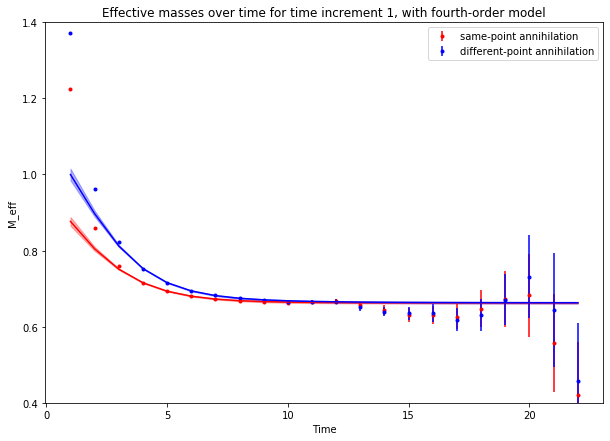

In [44]:
# Plot the fourth-order fit's result and the data's result for the effective mass
# Plot
model_eff_mass = np.array([np.log(y_sample[i]/y_sample[i+1]) for i in range(0,24)])

fig = plt.figure(figsize=(10,7))
ax = plt.axes()
ax.errorbar([i for i in range(1,23)], [eff_mass[0][i].mean for i in range(1,23)], yerr=[eff_mass[0][i].sdev for i in range(1,23)], fmt='.', label="same-point annihilation", color="red")
ax.errorbar([i for i in range(1,23)], [eff_mass[1][i].mean for i in range(1,23)], yerr=[eff_mass[1][i].sdev for i in range(1,23)], fmt='.', label="different-point annihilation", color="blue")

ax.errorbar([i for i in range(1,23)],[model_eff_mass[i][0][0].mean for i in range(1,23)],ls='-',color="red")
ax.fill_between([i for i in range(1,23)],[model_eff_mass[i][0][0].mean + model_eff_mass[i][0][0].sdev for i in range(1,23)], [model_eff_mass[i][0][0].mean - model_eff_mass[i][0][0].sdev for i in range(1,23)], color="red",alpha=0.3)
ax.errorbar([i for i in range(1,23)],[model_eff_mass[i][1][0].mean for i in range(1,23)],ls='-',color="blue")
ax.fill_between([i for i in range(1,23)],[model_eff_mass[i][1][0].mean + model_eff_mass[i][1][0].sdev for i in range(1,23)], [model_eff_mass[i][1][0].mean - model_eff_mass[i][1][0].sdev for i in range(1,23)], color="blue",alpha=0.3)

plt.xlabel("Time")
plt.ylabel("M_eff")
plt.ylim(0.4, 1.4)
plt.title("Effective masses over time for time increment {}, with fourth-order model".format(tau))
plt.legend()
plt.show()

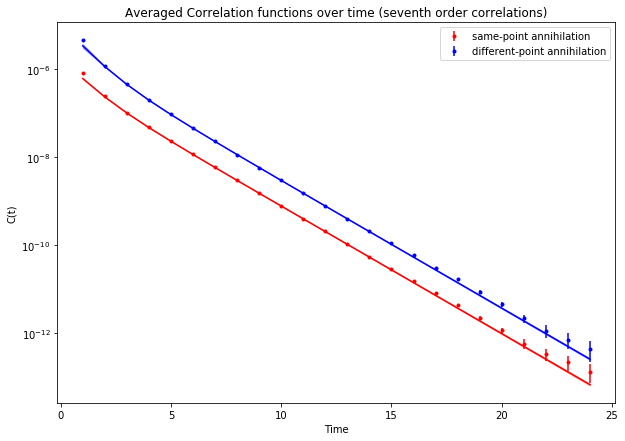

In [45]:
num_zs = 7
# Plot the results of the 7th-order fit vs. the actual data
# Compute function output
y_sample = C_2pt(np.array([i for i in range(0,25)]), fit7.p)

# Plot
fig = plt.figure(figsize=(10,7))
ax = plt.axes()
ax.semilogy()
ax.errorbar([i for i in range(1,25)], [proton_timeavg[i][0][0].mean for i in range(1,25)], yerr=[proton_timeavg[i][0][0].sdev for i in range(1,25)], fmt='.', label="same-point annihilation", color='red')
ax.errorbar([i for i in range(1,25)], [proton_timeavg[i][1][0].mean for i in range(1,25)], yerr=[proton_timeavg[i][1][0].sdev for i in range(1,25)], fmt='.', label="different-point annihilation", color='blue')
ax.errorbar([i for i in range(1,25)],[y_sample[i][0][0].mean for i in range(1,25)],ls='-',color="red")
ax.fill_between([i for i in range(1,25)],[y_sample[i][0][0].mean + y_sample[i][0][0].sdev for i in range(1,25)], [y_sample[i][0][0].mean - y_sample[i][0][0].sdev for i in range(1,25)], color="red",alpha=0.3)
ax.errorbar([i for i in range(1,25)],[y_sample[i][1][0].mean for i in range(1,25)],ls='-',color="blue")
ax.fill_between([i for i in range(1,25)],[y_sample[i][1][0].mean + y_sample[i][1][0].sdev for i in range(1,25)], [y_sample[i][1][0].mean - y_sample[i][1][0].sdev for i in range(1,25)], color="blue",alpha=0.3)
plt.xlabel("Time")
plt.ylabel("C(t)")
plt.title("Averaged Correlation functions over time (seventh order correlations)")
plt.legend()
plt.show()

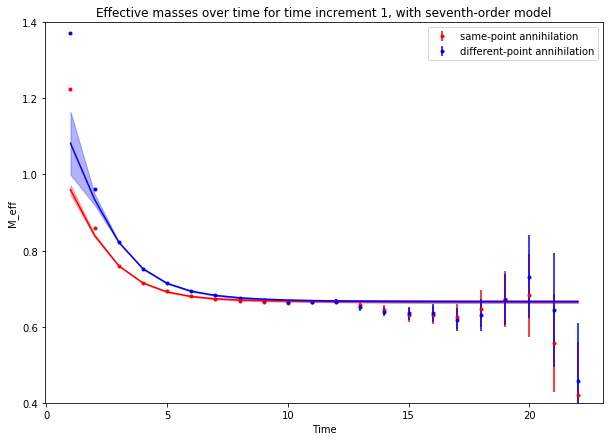

In [46]:
# Plot the seventh-order fit's result and the data's result for the effective mass
# Plot
model_eff_mass = np.array([np.log(y_sample[i]/y_sample[i+1]) for i in range(0,24)])

fig = plt.figure(figsize=(10,7))
ax = plt.axes()
ax.errorbar([i for i in range(1,23)], [eff_mass[0][i].mean for i in range(1,23)], yerr=[eff_mass[0][i].sdev for i in range(1,23)], fmt='.', label="same-point annihilation", color="red")
ax.errorbar([i for i in range(1,23)], [eff_mass[1][i].mean for i in range(1,23)], yerr=[eff_mass[1][i].sdev for i in range(1,23)], fmt='.', label="different-point annihilation", color="blue")

ax.errorbar([i for i in range(1,23)],[model_eff_mass[i][0][0].mean for i in range(1,23)],ls='-',color="red")
ax.fill_between([i for i in range(1,23)],[model_eff_mass[i][0][0].mean + model_eff_mass[i][0][0].sdev for i in range(1,23)], [model_eff_mass[i][0][0].mean - model_eff_mass[i][0][0].sdev for i in range(1,23)], color="red",alpha=0.3)
ax.errorbar([i for i in range(1,23)],[model_eff_mass[i][1][0].mean for i in range(1,23)],ls='-',color="blue")
ax.fill_between([i for i in range(1,23)],[model_eff_mass[i][1][0].mean + model_eff_mass[i][1][0].sdev for i in range(1,23)], [model_eff_mass[i][1][0].mean - model_eff_mass[i][1][0].sdev for i in range(1,23)], color="blue",alpha=0.3)

plt.xlabel("Time")
plt.ylabel("M_eff")
plt.ylim(0.4, 1.4)
plt.title("Effective masses over time for time increment {}, with seventh-order model".format(tau))
plt.legend()
plt.show()

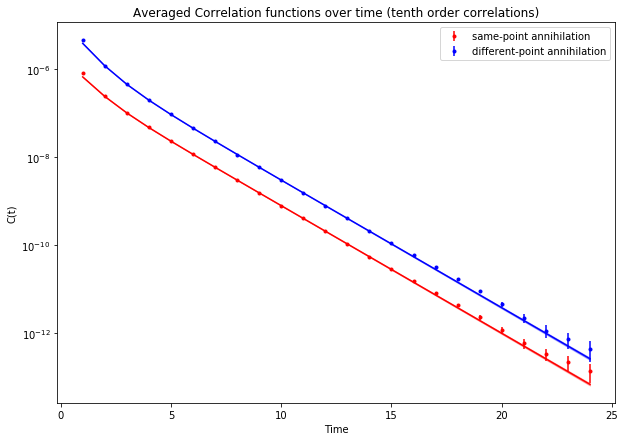

In [47]:
# Plot the results of the 10th-order fit vs. the actual data
# Compute function output
num_zs = 10
y_sample = C_2pt(np.array([i for i in range(0,25)]), fit10.p)

# Plot
fig = plt.figure(figsize=(10,7))
ax = plt.axes()
ax.semilogy()
ax.errorbar([i for i in range(1,25)], [proton_timeavg[i][0][0].mean for i in range(1,25)], yerr=[proton_timeavg[i][0][0].sdev for i in range(1,25)], fmt='.', label="same-point annihilation", color='red')
ax.errorbar([i for i in range(1,25)], [proton_timeavg[i][1][0].mean for i in range(1,25)], yerr=[proton_timeavg[i][1][0].sdev for i in range(1,25)], fmt='.', label="different-point annihilation", color='blue')
ax.errorbar([i for i in range(1,25)],[y_sample[i][0][0].mean for i in range(1,25)],ls='-',color="red")
ax.fill_between([i for i in range(1,25)],[y_sample[i][0][0].mean + y_sample[i][0][0].sdev for i in range(1,25)], [y_sample[i][0][0].mean - y_sample[i][0][0].sdev for i in range(1,25)], color="red",alpha=0.3)
ax.errorbar([i for i in range(1,25)],[y_sample[i][1][0].mean for i in range(1,25)],ls='-',color="blue")
ax.fill_between([i for i in range(1,25)],[y_sample[i][1][0].mean + y_sample[i][1][0].sdev for i in range(1,25)], [y_sample[i][1][0].mean - y_sample[i][1][0].sdev for i in range(1,25)], color="blue",alpha=0.3)
plt.xlabel("Time")
plt.ylabel("C(t)")
plt.title("Averaged Correlation functions over time (tenth order correlations)")
plt.legend()
plt.show()

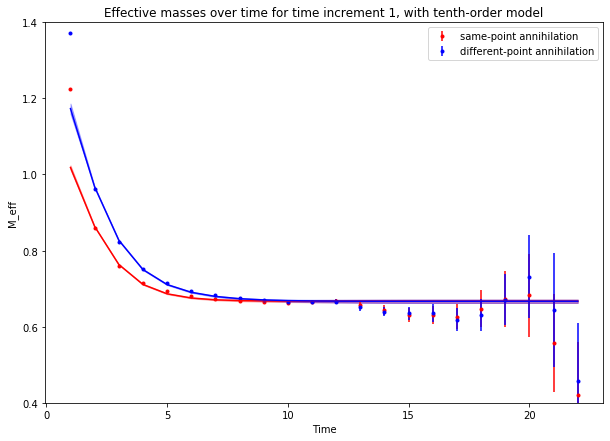

In [48]:
# Plot the eleventh-order fit's result and the data's result for the effective mass
# Plot
model_eff_mass = np.array([np.log(y_sample[i]/y_sample[i+1]) for i in range(0,24)])

fig = plt.figure(figsize=(10,7))
ax = plt.axes()
ax.errorbar([i for i in range(1,23)], [eff_mass[0][i].mean for i in range(1,23)], yerr=[eff_mass[0][i].sdev for i in range(1,23)], fmt='.', label="same-point annihilation", color="red")
ax.errorbar([i for i in range(1,23)], [eff_mass[1][i].mean for i in range(1,23)], yerr=[eff_mass[1][i].sdev for i in range(1,23)], fmt='.', label="different-point annihilation", color="blue")

ax.errorbar([i for i in range(1,23)],[model_eff_mass[i][0][0].mean for i in range(1,23)],ls='-',color="red")
ax.fill_between([i for i in range(1,23)],[model_eff_mass[i][0][0].mean + model_eff_mass[i][0][0].sdev for i in range(1,23)], [model_eff_mass[i][0][0].mean - model_eff_mass[i][0][0].sdev for i in range(1,23)], color="red",alpha=0.3)
ax.errorbar([i for i in range(1,23)],[model_eff_mass[i][1][0].mean for i in range(1,23)],ls='-',color="blue")
ax.fill_between([i for i in range(1,23)],[model_eff_mass[i][1][0].mean + model_eff_mass[i][1][0].sdev for i in range(1,23)], [model_eff_mass[i][1][0].mean - model_eff_mass[i][1][0].sdev for i in range(1,23)], color="blue",alpha=0.3)

plt.xlabel("Time")
plt.ylabel("M_eff")
plt.ylim(0.4, 1.4)
plt.title("Effective masses over time for time increment {}, with tenth-order model".format(tau))
plt.legend()
plt.show()

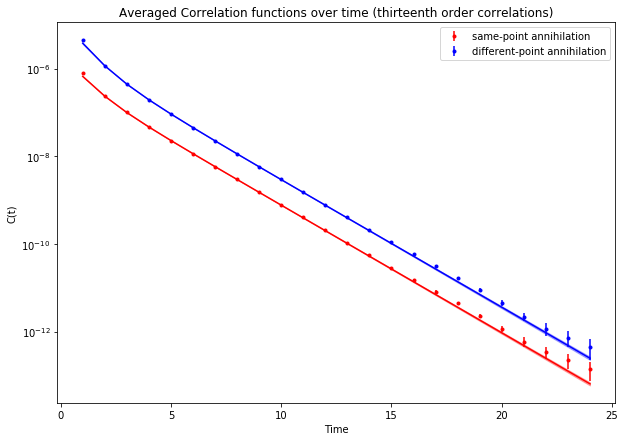

In [49]:
# Plot the results of the 13th-order fit vs. the actual data
# Compute function output
num_zs = 13
y_sample = C_2pt(np.array([i for i in range(0,25)]), fit13.p)

# Plot
fig = plt.figure(figsize=(10,7))
ax = plt.axes()
ax.semilogy()
ax.errorbar([i for i in range(1,25)], [proton_timeavg[i][0][0].mean for i in range(1,25)], yerr=[proton_timeavg[i][0][0].sdev for i in range(1,25)], fmt='.', label="same-point annihilation", color='red')
ax.errorbar([i for i in range(1,25)], [proton_timeavg[i][1][0].mean for i in range(1,25)], yerr=[proton_timeavg[i][1][0].sdev for i in range(1,25)], fmt='.', label="different-point annihilation", color='blue')
ax.errorbar([i for i in range(1,25)],[y_sample[i][0][0].mean for i in range(1,25)],ls='-',color="red")
ax.fill_between([i for i in range(1,25)],[y_sample[i][0][0].mean + y_sample[i][0][0].sdev for i in range(1,25)], [y_sample[i][0][0].mean - y_sample[i][0][0].sdev for i in range(1,25)], color="red",alpha=0.3)
ax.errorbar([i for i in range(1,25)],[y_sample[i][1][0].mean for i in range(1,25)],ls='-',color="blue")
ax.fill_between([i for i in range(1,25)],[y_sample[i][1][0].mean + y_sample[i][1][0].sdev for i in range(1,25)], [y_sample[i][1][0].mean - y_sample[i][1][0].sdev for i in range(1,25)], color="blue",alpha=0.3)
plt.xlabel("Time")
plt.ylabel("C(t)")
plt.title("Averaged Correlation functions over time (thirteenth order correlations)")
plt.legend()
plt.show()

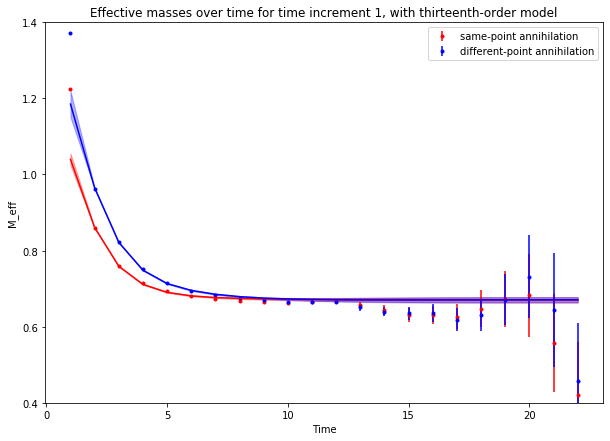

In [50]:
# Plot the thirteenth-order fit's result and the data's result for the effective mass
# Plot
model_eff_mass = np.array([np.log(y_sample[i]/y_sample[i+1]) for i in range(0,24)])

fig = plt.figure(figsize=(10,7))
ax = plt.axes()
ax.errorbar([i for i in range(1,23)], [eff_mass[0][i].mean for i in range(1,23)], yerr=[eff_mass[0][i].sdev for i in range(1,23)], fmt='.', label="same-point annihilation", color="red")
ax.errorbar([i for i in range(1,23)], [eff_mass[1][i].mean for i in range(1,23)], yerr=[eff_mass[1][i].sdev for i in range(1,23)], fmt='.', label="different-point annihilation", color="blue")

ax.errorbar([i for i in range(1,23)],[model_eff_mass[i][0][0].mean for i in range(1,23)],ls='-',color="red")
ax.fill_between([i for i in range(1,23)],[model_eff_mass[i][0][0].mean + model_eff_mass[i][0][0].sdev for i in range(1,23)], [model_eff_mass[i][0][0].mean - model_eff_mass[i][0][0].sdev for i in range(1,23)], color="red",alpha=0.3)
ax.errorbar([i for i in range(1,23)],[model_eff_mass[i][1][0].mean for i in range(1,23)],ls='-',color="blue")
ax.fill_between([i for i in range(1,23)],[model_eff_mass[i][1][0].mean + model_eff_mass[i][1][0].sdev for i in range(1,23)], [model_eff_mass[i][1][0].mean - model_eff_mass[i][1][0].sdev for i in range(1,23)], color="blue",alpha=0.3)

plt.xlabel("Time")
plt.ylabel("M_eff")
plt.ylim(0.4, 1.4)
plt.title("Effective masses over time for time increment {}, with thirteenth-order model".format(tau))
plt.legend()
plt.show()